In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

In [2]:
df = pd.read_csv('Data/canada_per_capita_income.csv')
df.head()

,year,per capita income (US$)
0,1970,3399.299037
1,1971,3768.297935
2,1972,4251.175484
3,1973,4804.463248
4,1974,5576.514583


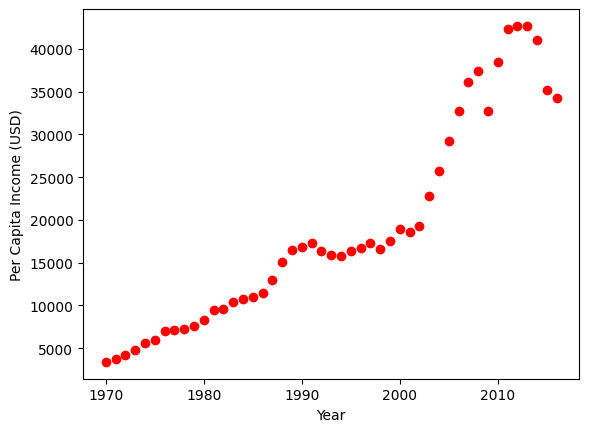

In [3]:
%matplotlib inline
plt.xlabel('Year')
plt.ylabel('Per Capita Income (USD)')
plt.scatter(df.year, df['per capita income (US$)'], color='red', marker='o')

In [4]:
new_df = df.drop('per capita income (US$)', axis='columns')
new_df.head()

,year
0,1970
1,1971
2,1972
3,1973
4,1974


In [5]:
price = df['per capita income (US$)']
price.head()

0    3399.299037
1    3768.297935
2    4251.175484
3    4804.463248
4    5576.514583
Name: per capita income (US$), dtype: float64

In [71]:
# Create linear regression object
reg1 = linear_model.LinearRegression()
# Fit the model
reg1.fit(new_df, price)

LinearRegression()

Predicting Price for year 2020

In [72]:
reg1.predict([[2020]])

c:\Users\Tarun\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([41288.69409442])

In [73]:
reg1.coef_

array([828.46507522])

In [74]:
reg1.intercept_

np.float64(-1632210.7578554575)

Y = m*X + b (m is coefficient and b is intercept)

In [10]:
(828.46507522*2020) - 1632210.7578554575

41288.694088942604

## Linear Regression Multiple Variables

In [15]:
hp = pd.read_csv('Data/homeprices.csv')
hp.head()

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,NaN,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000


In [18]:
import math
median_bedrooms = math.floor(hp.bedrooms.median())
median_bedrooms

4

In [22]:
hp.bedrooms = hp.bedrooms.fillna(median_bedrooms)
hp.head()

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,4.0,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000


In [75]:
reg2 = linear_model.LinearRegression()
reg2.fit(hp[['area', 'bedrooms', 'age']], hp.price)

LinearRegression()

In [76]:
reg2.coef_

array([  112.06244194, 23388.88007794, -3231.71790863])

In [78]:
reg2.intercept_

np.float64(221323.0018654043)

In [79]:
reg2.predict([[3000, 4, 40]])

c:\Users\Tarun\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([521797.13165825])

In [80]:
reg2.predict([[2500, 4, 5]])

c:\Users\Tarun\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([578876.03748933])

In [59]:
hire = pd.read_csv('Data/hiring.csv')
hire

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,NaN,8.0,9,50000
1,NaN,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,NaN,7,72000
7,eleven,7.0,8,80000


In [60]:
hire.experience = hire.experience.fillna(0)
hire

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,0,8.0,9,50000
1,0,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,NaN,7,72000
7,eleven,7.0,8,80000


In [61]:
from word2number import w2n

In [62]:
hire.experience = hire.experience.apply(lambda x: w2n.word_to_num(x) if isinstance(x, str) else x)
hire

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,0,8.0,9,50000
1,0,8.0,6,45000
2,5,6.0,7,60000
3,2,10.0,10,65000
4,7,9.0,6,70000
5,3,7.0,10,62000
6,10,NaN,7,72000
7,11,7.0,8,80000


In [63]:
mean_test_score = math.floor(hire['test_score(out of 10)'].mean())
mean_test_score

7

In [65]:
hire['test_score(out of 10)'] = hire['test_score(out of 10)'].fillna(mean_test_score)
hire

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,0,8.0,9,50000
1,0,8.0,6,45000
2,5,6.0,7,60000
3,2,10.0,10,65000
4,7,9.0,6,70000
5,3,7.0,10,62000
6,10,7.0,7,72000
7,11,7.0,8,80000


In [81]:
reg3 = linear_model.LinearRegression()
reg3.fit(hire[['experience', 'test_score(out of 10)', 'interview_score(out of 10)']], hire['salary($)'])

LinearRegression()

In [82]:
reg3.coef_

array([2922.26901502, 2221.30909959, 2147.48256637])

In [83]:
reg3.intercept_

np.float64(14992.65144669314)

In [84]:
reg3.predict([[2, 9, 6]])

c:\Users\Tarun\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([53713.86677124])

In [85]:
reg3.predict([[12, 10, 10]])

c:\Users\Tarun\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([93747.79628651])

In [90]:
import pickle

In [91]:
with open('model_pickle', 'wb') as f:
    pickle.dump(reg3, f)

In [92]:
with open('model_pickle', 'rb') as f:
    mp = pickle.load(f)

In [93]:
mp.predict([[12, 10, 10]])

c:\Users\Tarun\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([93747.79628651])

In [95]:
import joblib
joblib.dump(reg3, 'model_joblib')

['model_joblib']

In [97]:
mj = joblib.load('model_joblib')

In [98]:
mj.predict([[12, 10, 10]])

c:\Users\Tarun\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([93747.79628651])